In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1. Introduction

By Serina Xiong and Wenrui Wu

In the last decade, social media marketing has become increasingly prevalent and effective. With the continuous development of artificial intelligent and machine learning, social media advertising is becoming increasingly accurate at reaching target audience and promote sales. With the help of immensely available data collected from users, social media companies such as Tiktok, Meta, and YouTube became some of the most crucial vehicles for online marketing and advertising. 

>(1a.) The dataset employed contains information of 400 users on their User ID, Gender, Age, Estimated Salary (in USD), and Purchase Indicator (binomial dummy). This dataset disregards the social media platform used for the campaigns, as well as the product being promoted. We understand that the 2 abovementioned factors would indeed affect the purchasing behavior, but due to data availability and privacy, we were not able to find datasets that are more detailed and conclusive. Consider the dataset we used in this research project to be a “catch-all analysis”, we want to answer the question of **whether a user would purchase a product displayed on their social media feed.**

>(1b.) The result from this analysis is helpful for companies to learn about social media user’s purchasing behavior associated with their gender, age, and income level. The information could help identify the most suitable demographic who are prone to buying products promoted online, subsequently increasing the customer conversion rate.

>(1c.) Through our research, we have found relevant papers that discussed the **qualitative** advantages of adopting social medial advertising as their main marketing strategies. For instance, Lovett and Staelin (2016) have found that 54% of consumer’s decision processes on purchasing are affected by social media communications. Vinerean (2017) had found social media to be an essential marketing tool for its ability to effectively drive sales, connect brands with consumers, monitor consumers’ discussions and sentiments, guide consumers’ decision-making processes, instigate engagements and interactions, and cultivate brand loyalty. \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However, there is a lack of **quantitative** research on the number of ads ran in relation to purchasing rate. As we briefly mentioned in the previous, there isn’t a large body of empirical papers or datasets on the subject matter, and we suspect the reason why being the controversial data privacy concerns and datasets’ internal uses protected by businesses. 


# 2.  Data

>(2a.) Our dataset was retrieved from Kaggle. The dataset includes 400 participants with five variables including User ID, Gender, Age, Estimated Salary, and Purchase indicator. The group consists of 51% female and 49% male, with an average estimated salary of $70,000 USD and 35.7% of purchasing rate. 

In [4]:
# Import Data
df = pd.read_csv('D:/USC/ECON570-Big Data/Code/Final/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
# Data Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


* 'User ID' : Integer value
* 'Gender' : Categorical value
* 'Age' : Integer value
* 'EstimatedSalary' : Integer value
* 'Purchased' :Target variable

## Data Cleaning

In [6]:
## missing value
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
## duplicate value
df.duplicated().sum()

0

<AxesSubplot:>

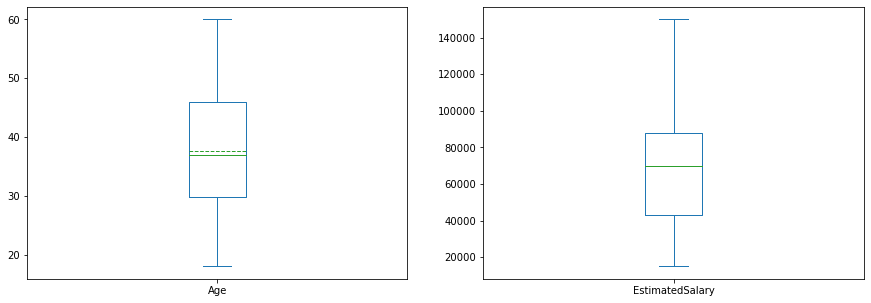

In [8]:
## remove outliers
fig, ax = plt.subplots(1,2, figsize = (15, 5))
df['Age'].plot.box(ax = ax[0], showmeans = True, meanline = True)
df['EstimatedSalary'].plot.box(ax = ax[1], showmeans = True, meanline = True)

>(2b.) There is no missing value, duplicate value, outliers to remove.

In [9]:
## drop useless column
df.drop('User ID', axis = 1, inplace=True)

## Correlation Analysis

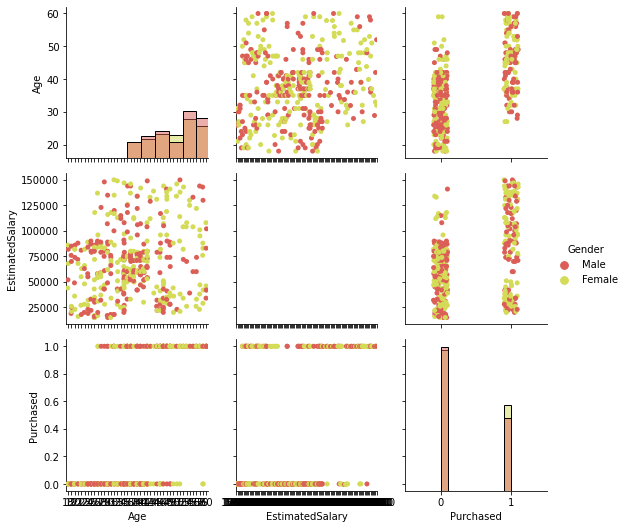

In [10]:
# Correlation Plot
sns.set_palette(sns.color_palette("hls"))
g = sns.PairGrid(df,hue='Gender')
g.map_diag(sns.histplot)
g.map_offdiag(sns.stripplot)
g.add_legend()

The result shows that 
>i. there is no significant correlation between Age and EstimatedSalary \
ii. there is positive relationship between Age and Purchased \
iii. there is positive relationship between EstimatedSalary and Purchased \
iv. there is no significant difference between Male and Female.

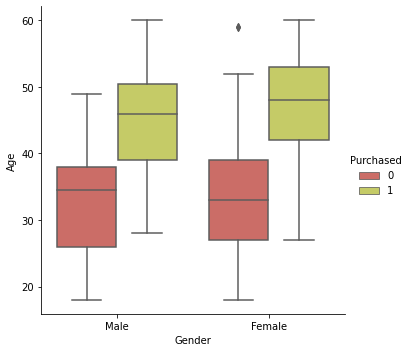

In [11]:
## Correlation between Age and Purchased with different Gender
sns.catplot(x='Gender', y='Age',hue = 'Purchased',kind="box", data=df)

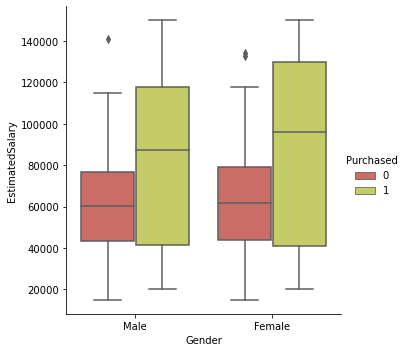

In [12]:
## Correlation between EstimatedSalary and Purchased with different Gender
sns.catplot(x='Gender', y='EstimatedSalary',hue = 'Purchased',kind="box", data=df)

>(2c.) It appears that Gender does not affects Purchases, which also means that Gender can be directly dropped instead of being transformed to binomial dummy.

In [13]:
## drop useless column
df.drop('Gender', axis = 1, inplace=True)

Now, here are only Age, EstimatedSalary and Purchased variables left.

<AxesSubplot:>

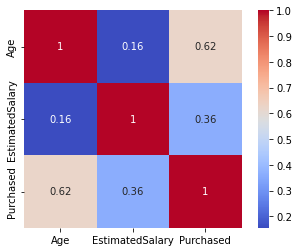

In [14]:
# Draw the heatmap with Age, EstimatedSalary and Purchased
sns.heatmap(df.corr(), square=True, annot=True, cmap="coolwarm")

It shows that the effect of Age on Purchased is greater than that of EstimatedSalary on Purchased.

In [15]:
# Redisplay Data
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Comprehensive Summary Statistics

>(2d.) Here are the comprehensive summary statistics of Age, EstimatedSalary and Purchased.

In [16]:
# Comprehensive Summary Statistics
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# 3.  Modeling

In [17]:
# Identify independent and dependent variables
X = df.drop('Purchased', axis = 1)
y = df['Purchased']

In [18]:
# Split training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
# normalizing
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### Define a function of confusion matrix

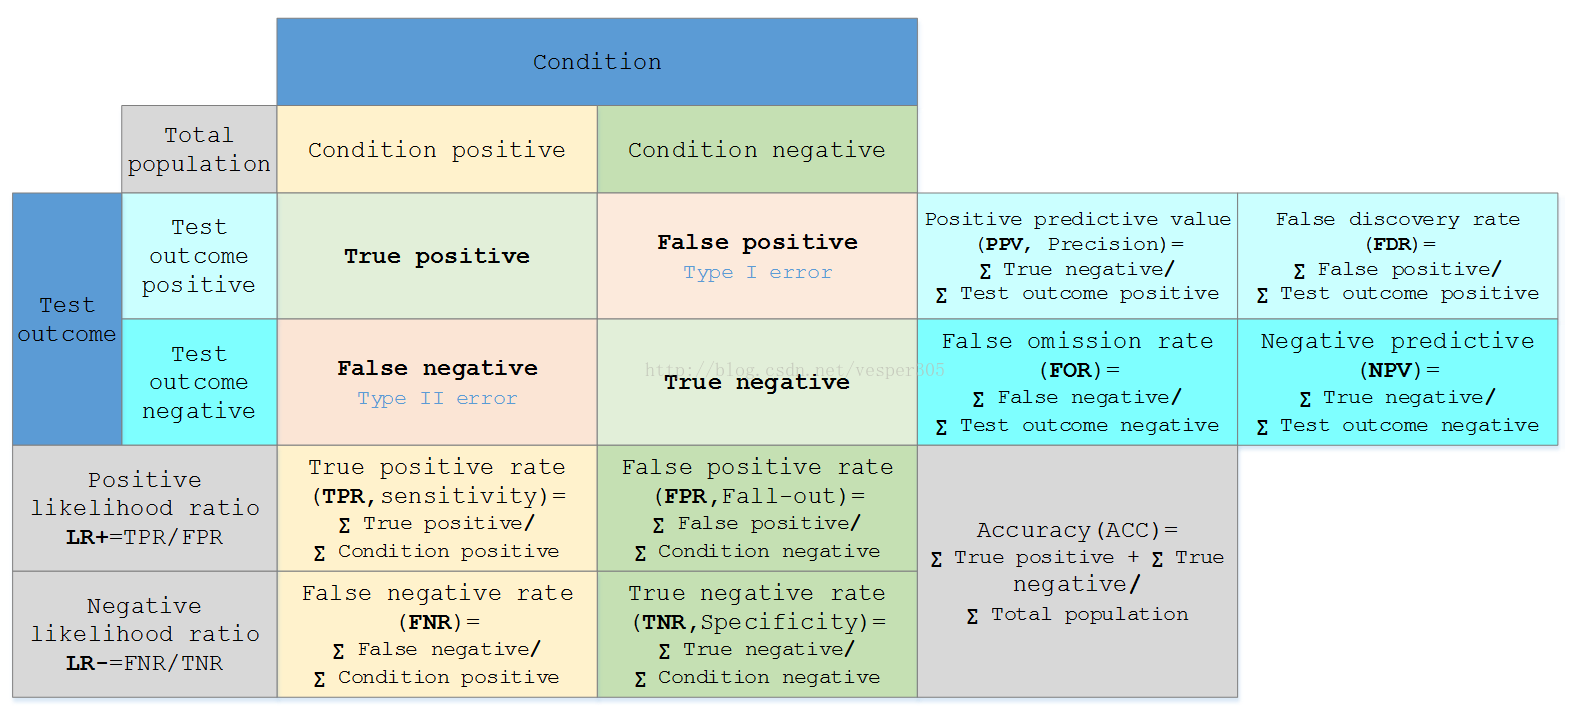

In [20]:
def predict(X_test,y_test):
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import plot_confusion_matrix
    
    # Predict testing set results
    y_pred = classifier.predict(X_test)
    
    
    # Create confusion matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_matrix)
    plot_confusion_matrix(classifier, X_train, y_train, cmap=plt.cm.Blues,normalize='true')
    plt.show()
    print("\n")
    
    
    # Different situation
    TP = confusion_matrix[0,0]
    TN = confusion_matrix[1,1]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    
    print("True positive(TP): ", TP)
    print("True negative(TN): ", TN)
    print("False positive(FP): ", FP)
    print("False negative(FN): ", FN)
    print("\n")    
    
    
    # Ratios
    PPV = TP/(TP + FP)
    print("Positive prediction value(PPV):  ", PPV)
    FDR = FP/(FP + TP)
    print("False discovery rate(FDR): ", FDR)
    print("\n")
    
    FOR = FN/(FN + TP)
    print("False omission Rate(FOR): ", FOR)
    NPV = TN/(TN + FN)
    print("Negative predictive value(NPV): ", NPV)    
    print("\n")
    
    TPR = TP/(TP + FN)
    print("True positive rate(TPR): ", TPR)
    FNR = FN/(TP + FN)
    print("False negative rate(FNR): ", FNR)    
    print("\n")
    
    FPR = FP/(FP + TN)
    print("False positive rate(FPR): ", FPR)
    TNR = TN/(FP + TN)
    print("True negative rate(TNR): ", TNR)
    print("\n")
    
    
    ACC = (TP + TN)/(TP + FP + TN + FN)
    print("Accuracy(ACC): ", ACC)
    print("\n")

### Logistics Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Run Regression on the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Confusion Matrix:
[[74  5]
 [11 30]]


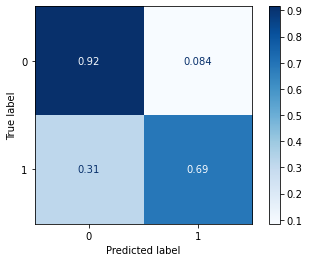



True positive(TP):  74
True negative(TN):  30
False positive(FP):  5
False negative(FN):  11


Positive prediction value(PPV):   0.9367088607594937
False discovery rate(FDR):  0.06329113924050633


False omission Rate(FOR):  0.12941176470588237
Negative predictive value(NPV):  0.7317073170731707


True positive rate(TPR):  0.8705882352941177
False negative rate(FNR):  0.12941176470588237


False positive rate(FPR):  0.14285714285714285
True negative rate(TNR):  0.8571428571428571


Accuracy(ACC):  0.8666666666666667




In [23]:
# Predict testing set results and create confusion matrix
predict(X_test,y_test)

It shows that 
>Precision(PPV) of Logistic Regression Classifier on testing set is 0.94\
Recall(TPR) of Logistic Regression Classifier on testing set is 0.87\
Accuracy of Logistic Regression Classifier on testing set is 0.87.

### K-Nearest Neighbors Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Run Regression on the training set
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Confusion Matrix:
[[73  6]
 [ 4 37]]


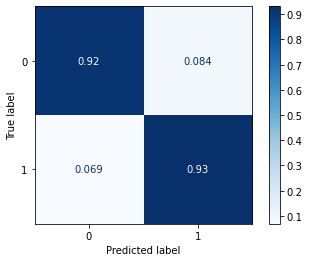



True positive(TP):  73
True negative(TN):  37
False positive(FP):  6
False negative(FN):  4


Positive prediction value(PPV):   0.9240506329113924
False discovery rate(FDR):  0.0759493670886076


False omission Rate(FOR):  0.05194805194805195
Negative predictive value(NPV):  0.9024390243902439


True positive rate(TPR):  0.948051948051948
False negative rate(FNR):  0.05194805194805195


False positive rate(FPR):  0.13953488372093023
True negative rate(TNR):  0.8604651162790697


Accuracy(ACC):  0.9166666666666666




In [26]:
# Predict testing set results and create confusion matrix
predict(X_test,y_test)

It shows that 
>Precision(PPV) of K-Nearest Neighbors Classifier on testing set is 0.92\
Recall(TPR) of K-Nearest Neighbors Classifier on testing set is 0.95\
Accuracy of K-Nearest Neighbors Classifier on testing set is 0.92.

### Support Vector Classifier

In [27]:
from sklearn import svm

In [28]:
# Run Regression on the training set
classifier = svm.SVC(kernel = 'rbf',  random_state = 2)
classifier.fit(X_train, y_train)

SVC(random_state=2)

Confusion Matrix:
[[72  7]
 [ 4 37]]


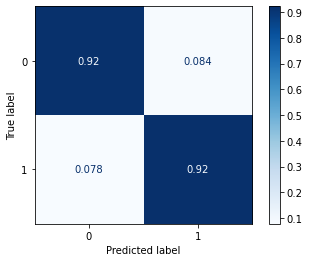



True positive(TP):  72
True negative(TN):  37
False positive(FP):  7
False negative(FN):  4


Positive prediction value(PPV):   0.9113924050632911
False discovery rate(FDR):  0.08860759493670886


False omission Rate(FOR):  0.05263157894736842
Negative predictive value(NPV):  0.9024390243902439


True positive rate(TPR):  0.9473684210526315
False negative rate(FNR):  0.05263157894736842


False positive rate(FPR):  0.1590909090909091
True negative rate(TNR):  0.8409090909090909


Accuracy(ACC):  0.9083333333333333




In [29]:
# Predict testing set results and create confusion matrix
predict(X_test,y_test)

It shows that 
>Precision(PPV) of Support Vector Classifier on testing set is 0.91\
Recall(TPR) of Support Vector Classifier on testing set is 0.95\
Accuracy of Support Vector Classifier on testing set is 0.91.

# 4.  Findings

>(4a.) Our results have shown that, for any social media platform or product, gender is uninformative in predicting whether the consumer would purchase the product when they saw the ads on their social media feed. Age is more of an indicator comparing to  income. In terms of testing models, KNN and SVM models produces better and more conclusive results.

>(4b.) Our findings above are robust to different model specifications.\
Because the precision, recall, accuracy ratios of the three models are similar.


# 5.  Conclusion

>(5a.) Our analysis suggests to pay close attention to pinpointing target audience based on age rather than other factors when social media platform and product are not considered. However, our model also seek greater accuracy if we were able to factor in other elements other than age, gender, and income. 

>(5b.) In the future, if we have products we intend to promote, we could run actual social media advertisements on specific platforms to test user impression and engagements. This way, we would have access to more conclusive data that can help narrow the scope of our research. We can also conduct controlled testing across various platforms to compare performances. What is more, if we can gather more information on the users, such as their geographic locations, interests, or occupation, we can be better informed of user preferences to pinpoint the right group of audience more accurately. Last but not least, we should try to include more samples, larger than 400, to increase the accuracy of results.
 
